In [39]:
T = BigFloat  # precision type (change here if needed)
setprecision(T, 512) #Huge precision - plenty of work could be done.

#Flat space runs with 128 bits for the BigFloat, but a normal Float64 does not seem to work.
#Higher amounts of precision are needed to see all of the ringdown.

# T=Float64;

include("FlatTimeStepExpr.jl")
include("FlatCoeffExpr.jl")
include("CosmoConstrExpr.jl")
include("cheb.jl")
include("solvers.jl")

Vfun(x) = ( -576. - 288. * x^2 - 64. * x^4 + 22. * x^6 - x^8) / 192.;
DV(x) = - x * (144. + 64. * x^2 - 33. * x^4 + 2. * x^6) / 48.;

In [40]:


Ndom = 4;
Npts = 15;
N = Ndom * Npts;
NVar = 5;
IterMax = 10;

zmin = T(0);
zmax = T(.6);

DiffMats2, DiffMats, grid = MultiGridChebyshev(zmin, zmax, Ndom,Npts);

DS0f(t) = T(1.);
DS1f(t) = T(0.);
DS2f(t) = T(0.);
DS3f(t) = T(0.);
DS4f(t) = T(0.);

In [41]:
InitGuess = zeros(T,NVar,N);

# AHind = Int64(30);
zAH = T(0.5);
X = T(0.);
p2 = 0;
inita4 = T(-50);
tinit = T(0);
M  = T(1);
margin = 10;


In [42]:
Var = copy(InitGuess);
Var[2,1:N] = LinearSolveODE(Var, 1, inita4, X, tinit);
Var[3,1:N] = LinearSolveODE(Var, 2, inita4, X, tinit);

In [45]:
VarZ,VarZZ = ComputeDerivatives(Var);

In [59]:
mat, src, srcP = ComputeODEMatrix(1, 4, Var, VarZ, VarZZ, 0, 0, -50, 0)

(BigFloat[89064.1349999999999999900079927783735913210765896483572590808738824881530225796577582286772667430341243743896484375000000000000000000000000000000000000001857 -143289.274698758631598529441336871351325503686127677743532802176447516249226512322920164377813346627978621700378669383896071892611957954320116263184706962415 … -4690.34129756499809725476939417798345915072654548176374364555433492549130949081337513298171253397073218025111324472189572787422073949895082644342173529314495 2315.99999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999998595; 42533.6963243932008638082321541590627919774651845927236850216397846074959173074005663165539011525538849017515242510201390609404461470077085926711284026921731 -61973.099068420991203838260106702304895188956235865845086927821615694359991751121313068682763520547216530964620156944132588184671450323491875747408373061794 … -410.382865292421015841930806372623

In [61]:
mat

15×15 Matrix{BigFloat}:
 89064.1     -143289.0      79590.2     …    -4690.34      2316.0
 42533.7      -61973.1      23589.0           -410.383      202.467
 -2647.77      10534.1     -13764.4            142.054      -69.9524
   520.118     -1413.65      4378.0            -97.6393      47.9589
  -164.003       395.25      -722.868           89.6891     -43.91
    67.7784     -154.884      233.436   …      -97.0887      47.3223
   -34.2056       75.924     -103.819          118.33       -57.308
    21.0         -45.6652      58.5723        -160.545       77.0
   -16.2664       34.7062     -42.096          244.853     -115.603
    16.4408      -34.4404      39.605         -432.893      198.87
   -21.5241       44.426      -48.8956  …      945.968     -412.24
    35.7802      -73.134       78.1487       -2939.89      1135.82
   -79.2308      161.047     -169.173        19639.9      -5175.99
   317.186      -642.953      669.673      -110044.0      77474.6
  4192.0       -8489.61      881

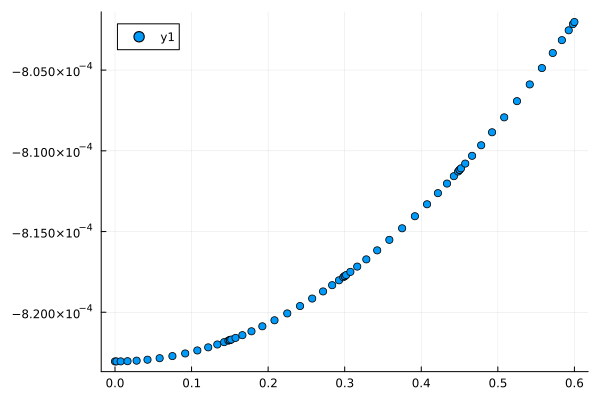

In [48]:
plt.scatter(grid,VarZZ[2,:])

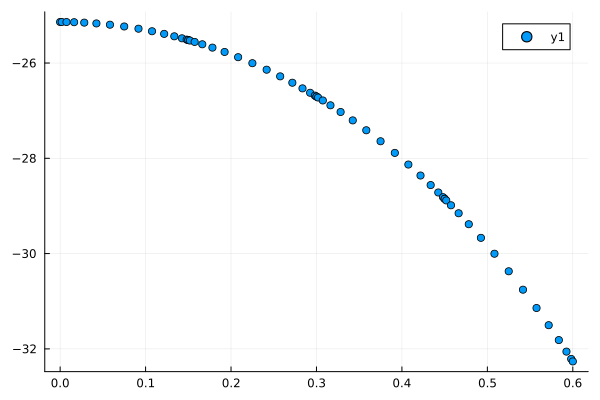

In [32]:
plt.scatter(grid,Var[3,1:N])

In [20]:
# Computing the initial values of the fields, in particular of ξ(t_0)

X = T(0.);
Var = copy(InitGuess);
for ii in 1:500
    Var[2,1:N] = LinearSolveODE(Var, 1, inita4, X, tinit);
    Var[3,1:N] = LinearSolveODE(Var, 2, inita4, X, tinit);
    X = CorrectXi(Var, X, tinit,margin);
    print("\rX = $X")
    flush(stdout)
end

X = 0.751716684808845570202382750669096530244241838676859307972506833804957984493495875275684998325327921703813286316499825125386189704569665509488453500708028657

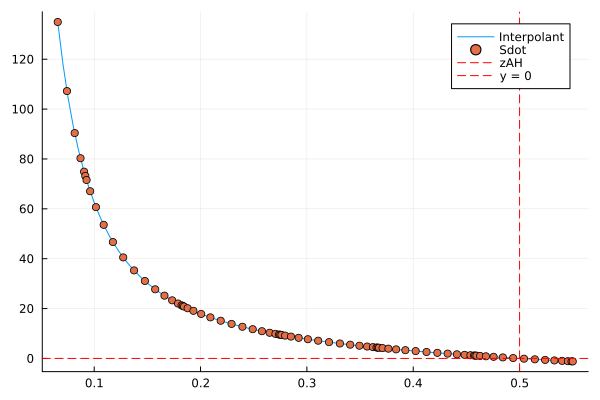

In [11]:
fig = PlotSdot(Var, X, 0,10)

In [17]:
initX = copy(X);

Ndom = 4;
Npts = 15;
N = Ndom * Npts;
NVar = 5;
IterMax = 10;

zmin = T(1.e-40);
zmax = T(.5);

DiffMats2, DiffMats, grid = MultiGridChebyshev(zmin, zmax, Ndom,Npts);

InitGuess = zeros(T,NVar,N);
InitVar = ComputeBulk(InitGuess[1,1:N], initX, inita4,0);

In [18]:
dt=.001;
tinit = zero(T);

outfile = open("FlatOutputA4100.bin","w");
monitorfile = open("FlatMonitorA4100.bin","w");

VarFinal, XFinal, a4Final = Evolve(InitVar, initX, inita4, tinit , 4, dt, 10, outfile, monitorfile)

close(outfile);
close(monitorfile);

◑ time = 4.000, constraint violation = 0.001    Time: 0:09:06

In [19]:
using Serialization

open("FlatInitialCondition.dat","w") do io
    serialize(io, [XFinal, a4Final, VarFinal]);
end